In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
import os

In [2]:
lenses = pd.read_csv("/content/lenses.data",sep='\s+',header=None)
lenses.rename(columns={0:'id',1:'age',2:'perscription',3:'astigmatic', 4:'tears',5:'lenses'}, inplace=True)
lenses.head(5)

,id,age,perscription,astigmatic,tears,lenses
0,1,1,1,1,1,3
1,2,1,1,1,2,2
2,3,1,1,2,1,3
3,4,1,1,2,2,1
4,5,1,2,1,1,3


In [3]:
lenses.corr()

,id,age,perscription,astigmatic,tears,lenses
id,1.000000,9.436285e-01,2.889260e-01,1.444630e-01,7.223151e-02,0.161804
age,0.943629,1.000000e+00,-7.931816e-17,-1.473052e-16,0.000000e+00,0.200745
perscription,0.288926,-7.931816e-17,1.000000e+00,-7.401487e-17,9.251859e-18,0.163908
astigmatic,0.144463,-1.473052e-16,-7.401487e-17,1.000000e+00,1.850372e-17,-0.163908
tears,0.072232,0.000000e+00,9.251859e-18,1.850372e-17,1.000000e+00,-0.710266
lenses,0.161804,2.007449e-01,1.639075e-01,-1.639075e-01,-7.102659e-01,1.000000


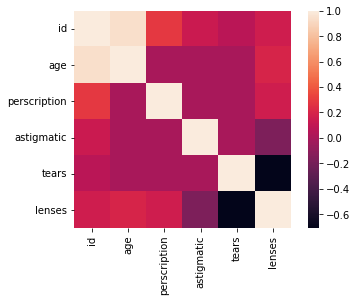

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
hm = sns.heatmap(lenses.corr(),
                 cbar=True,
                 square=True, 
                 yticklabels=lenses.columns,
                 xticklabels=lenses.columns)
plt.show()

In [4]:
X = lenses.drop(["lenses","id"], axis=1).values
Y = lenses["lenses"].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
X_train.shape

(16, 4)

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="gini") 
tree.fit(X_train, Y_train)

y_pred_train = tree.predict(X_train)
y_pred = tree.predict(X_test)

df_accuracy_train_dt = accuracy_score(Y_train, y_pred_train)
df_accuracy_test_dt = accuracy_score(Y_test, y_pred)

print("Accuracy: Train=%.4f Test=%.4f" % (df_accuracy_train_dt,df_accuracy_test_dt))

Accuracy: Train=1.0000 Test=0.8750


In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

y_pred_train = knn.predict(X_train)
y_pred = knn.predict(X_test)

accuracy_train_knn = accuracy_score(Y_train, y_pred_train)
accuracy_test_knn = accuracy_score(Y_test, y_pred)

print("Accuracy: Train=%.4f Test=%.4f" % (accuracy_train_knn,accuracy_test_knn))

Accuracy: Train=0.6250 Test=0.7500


In [11]:
num_classes = len(lenses["lenses"].unique())
num_classes

3

In [25]:
X = lenses.drop(["lenses","id"], axis=1)
Y = pd.get_dummies(lenses['lenses'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [26]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, batch_size=16, validation_data=(X_test, Y_test))

accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

Epoch 1/10
2/2 [==============================] - 1s 202ms/step - loss: 1.2626 - accuracy: 0.2105 - val_loss: 1.2210 - val_accuracy: 0.4000
Epoch 2/10
2/2 [==============================] - 0s 33ms/step - loss: 1.2490 - accuracy: 0.2632 - val_loss: 1.2075 - val_accuracy: 0.4000
Epoch 3/10
2/2 [==============================] - 0s 34ms/step - loss: 1.2359 - accuracy: 0.3158 - val_loss: 1.1948 - val_accuracy: 0.4000
Epoch 4/10
2/2 [==============================] - 0s 34ms/step - loss: 1.2227 - accuracy: 0.3158 - val_loss: 1.1822 - val_accuracy: 0.6000
Epoch 5/10
2/2 [==============================] - 0s 36ms/step - loss: 1.2116 - accuracy: 0.3158 - val_loss: 1.1693 - val_accuracy: 0.6000
Epoch 6/10
2/2 [==============================] - 0s 34ms/step - loss: 1.1995 - accuracy: 0.3158 - val_loss: 1.1567 - val_accuracy: 0.6000
Epoch 7/10
2/2 [==============================] - 0s 34ms/step - loss: 1.1890 - accuracy: 0.3158 - val_loss: 1.1443 - val_accuracy: 0.6000
Epoch 8/10
2/2 [==========

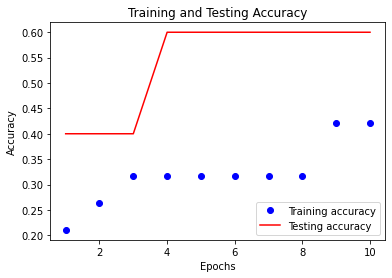

In [34]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']

test_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot the training and testing accuracy across epochs
plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
plt.plot(epochs, test_acc, 'r', label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


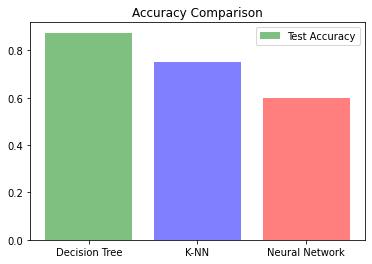

In [30]:
import matplotlib.pyplot as plt


df_nn_acc_train = history.history['accuracy'][-1]
df_nn_acc_test = accuracy[1]

models = ['Decision Tree', 'K-NN', 'Neural Network']
accuracy_test = [df_accuracy_test_dt, accuracy_test_knn, df_nn_acc_test]

colors = ['green', 'blue', 'red']

plt.bar(models, accuracy_test, color=colors, alpha=0.5)
plt.legend([ 'Test Accuracy'])
plt.title('Accuracy Comparison')
plt.show()
